<a href="https://colab.research.google.com/github/DanLangas/CursDL/blob/main/Tema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Incarcarea și pregătirea setului de date CIFAR-10

In [32]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizarea valorilor pixelilor la intervalul [0,1]

In [33]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definirea modelului CNN

In [34]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

#Compilarea modelului

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Antrenarea modelului

In [26]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 49s 38ms/step - loss: 1.5527 - accuracy: 0.4327 - val_loss: 1.3082 - val_accuracy: 0.5305
Epoch 2/10
1250/1250 [==============================] - 50s 40ms/step - loss: 1.1971 - accuracy: 0.5767 - val_loss: 1.1958 - val_accuracy: 0.5824
Epoch 3/10
1250/1250 [==============================] - 47s 38ms/step - loss: 1.0516 - accuracy: 0.6302 - val_loss: 1.0416 - val_accuracy: 0.6333
Epoch 4/10
1250/1250 [==============================] - 47s 37ms/step - loss: 0.9473 - accuracy: 0.6676 - val_loss: 0.9667 - val_accuracy: 0.6648
Epoch 5/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.8717 - accuracy: 0.6931 - val_loss: 0.9755 - val_accuracy: 0.6580
Epoch 6/10
1250/1250 [==============================] - 47s 37ms/step - loss: 0.8006 - accuracy: 0.7193 - val_loss: 0.9504 - val_accuracy: 0.6725
Epoch 7/10
1250/1250 [==============================] - 47s 37ms/step - loss: 0.7451 - accuracy: 0.7393 - val_loss: 0.9222 -

# Plotarea modelului

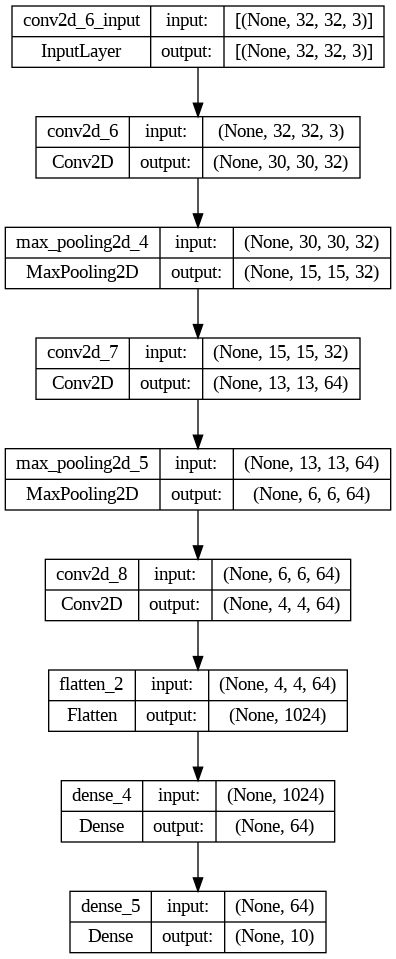

In [27]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Evaluarea performanței modelului

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.9028 - accuracy: 0.7001 - 3s/epoch - 9ms/step

Test accuracy: 0.7001000046730042


# Salvarea modelului antrenat

In [37]:
model.save('/content/gdrive/My Drive/cifar10_model.keras')

# Plotarea acurateței și pierderii pe setul de date de antrenare și validare pentru fiecare iterație

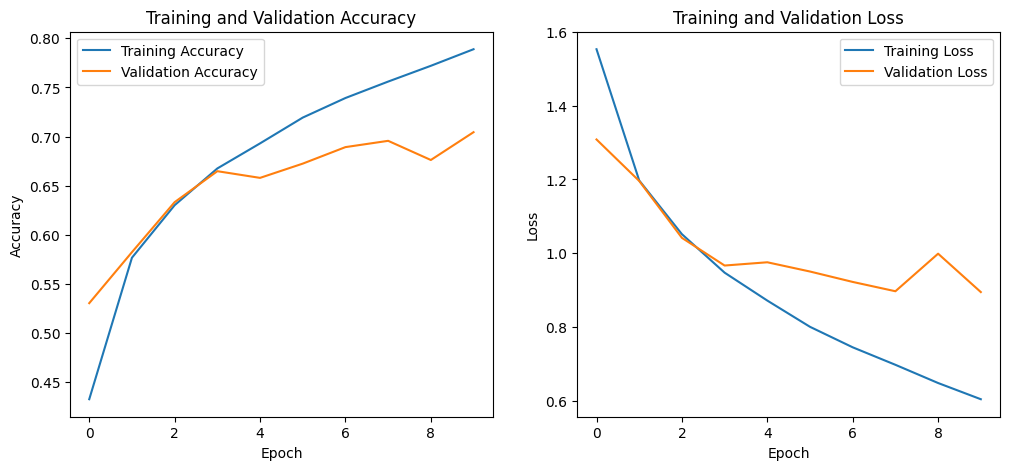

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()